In [5]:
# Modules 
import collections
import numpy as np
import seaborn as sbn
import matplotlib
import matplotlib.style
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import math
import seaborn as sns

import scipy.io
import scipy.stats

from IPython.display import HTML, display
matplotlib.rcParams.update({'font.size':19})
# matplotlib.style.use('bmh')

import math
import ast


## Define Functions

In [403]:
def compileResponse_matlabBR(openMatlabFile):
    responseTimes = openMatlabFile['responseArray']['times'][0]
    responseEvents = openMatlabFile['responseArray']['keyboardEvent'][0]

    noResponseDurations = []
    endTrialTime = 100.0

    leftDurations = []
    rightDurations = []

    # leftEyeD = []
    # rightEyeD = [] 

    numOfTrials = 4

    for i in range(numOfTrials):
        print(i)

    #     if i == 0 or i == 3:
    #         # 45 is in the left eye (i.e. right orientation in left eye)
    #         case = 0 
    #     elif i == 1 or i == 4:
    #         # left orientation is in the left eye 
    #         case = 1
        thisTrialTimes = responseTimes[i][0]
        thisTrialEvents = responseEvents[i][0]

        downEvents = [1, 3]
        numEvents = len(thisTrialEvents)
        keyDurA = np.zeros((numEvents, len(downEvents)))

        for eventIn in range(len(thisTrialEvents)):
            if thisTrialEvents[eventIn] == 99:
                print('end of trial?')
            else:
                event = thisTrialEvents[eventIn]
                time1 = thisTrialTimes[eventIn]

                if event in downEvents:
                    if event == 1: # LEFT key
                        upKey = 2

                    elif event == 3: # RIGHT key
                        upKey = 4
                    else:
                        upKey = 6
                        print(event, 'Down key not found...')
                        print(event)

    #                     if 'time2' in locals() and time2 < time1:
    #                         noResponseDuration = time1 - time2
    #                         noResponseDur.append(noResponseDuration)
    #                         print('time2: ', time2, 'time1: ', time1, 'time1 by KT:', kt[eventIn], 'event index:', eventIn, 'tempKT: ', tempKt)

                    foundUpKey = 0 # False
                    tempKt = np.array(thisTrialTimes)
                    tempTimes = tempKt[np.where(tempKt>time1)]
                    tempEvents = np.array(thisTrialEvents)
                    tempEvents = tempEvents[np.where(tempKt>time1)]
                    tempNumEvents = len(tempTimes)
                    for j in range(tempNumEvents):#range(numEvents):

                        if tempEvents[j] == upKey:
                            time2 = tempTimes[j]
                            foundUpKey = 1
                            break


                    # time 2 will be the start of the blank duration
                    if foundUpKey == 1:
                        blankStart = time2
                        if blankStart < 100.0:
                            print(j)
                            print(len(thisTrialEvents))
                            if j < tempNumEvents-1:
                                blankEnd = tempTimes[j+1]
                                if blankEnd < 100.0:
                                    if blankEnd - blankStart > 0:
                                        noResponseD = blankEnd - blankStart
                                        noResponseDurations.append(noResponseD)
                                       # print('blank: ',tempTimes[j+1])



                    if foundUpKey == 0:

                        if thisTrialTimes[-1] == 99: # and usingFullTrialDuration
                            time2 = thisTrialTimes[-1] # end of the key times
                        else:
                            time2 = endTrialTime
                            print('Using default trial length')

                    keyDur = time2 - time1 #keyDur[eventIn] 
                    if keyDur == 0:
                        print('upkey: ',upKey)
                    keyDurA[eventIn, int((upKey/2)-1)] = time2 - time1

                    if time2 - time1 == 0:
                        print('zero?')



        leftDurations.extend(keyDurA[:, 0])
        rightDurations.extend(keyDurA[:,1])
        

    # drop zeros from duration lists 
    leftDurations = [i for i in leftDurations if i != 0]
    rightDurations = [i for i in rightDurations if i != 0]
    
#     if case == 0:
#         leftEyeD.extend(keyDurA[:, 1])
#         rightEyeD.extend(keyDurA[:, 0])
#     elif case == 1:
#         leftEyeD.extend(keyDurA[:, 0])
#         rightEyeD.extend(keyDurA[:, 1])

    return leftDurations, rightDurations, noResponseDurations



# Function for creating buckets for Color Response on Laptop

In [404]:
def bucketResponse_basedOnColorResp_lp(rivalry_df): # this complete 
    redDurations = []
    blueDurations = []
    mixedDurations = []

    leftDurations = [] # 135
    rightDurations = [] # 45
    
    for i, row in rivalry_df.iterrows():
        responseLen = len(row['keyDur'])

        blueIs45 = 0

        if row['topColor'] == 'blue':
            if row['topOri'] == 45:
                blueIs45 = 1
            else:
                blueIs45 = 0
        else:
            if row['topOri'] == 45: # red is 45
                blueIs45 = 0
            else:
                blueIs45 = 1

        for j in range(responseLen):
            if row['keyName'][j] == 'right': # blue
                blueDurations.append(row['keyDur'][j])

                if blueIs45: # if true blue is 45 
                    rightDurations.append(row['keyDur'][j])
                else: # blue is not 45
                    leftDurations.append(row['keyDur'][j])

            elif row['keyName'][j] == 'left': # red
                redDurations.append(row['keyDur'][j])

                if blueIs45: # if true blue is 45 and red is 135 (left)
                    leftDurations.append(row['keyDur'][j])
                else: # blue is not 45
                    rightDurations.append(row['keyDur'][j])
            elif row['keyName'][j] == 'space': # mixed
                mixedDurations.append(row['keyDur'][j])
                
    return blueDurations, redDurations, leftDurations, rightDurations, mixedDurations 

# Function for creating buckets for Orientation Response on Laptop

In [405]:
def bucketResponse_basedOnOrientationResp_lp(rivalry_df):
    redDurations = []
    blueDurations = []
    mixedDurations = []

    leftDurations = [] # 135
    rightDurations = [] # 45
    
    for i, row in rivalry_df.iterrows():
        responseLen = len(row['keyDur'])
        
        
        blueIs45 = 0

        if row['topColor'] == 'blue':  
            if row['topOri'] == 45:
                blueIs45 = 1
            else:
                blueIs45 = 0
        else:
            if row['topOri'] == 45: # red is 45
                blueIs45 = 0
            else:
                blueIs45 = 1

        for j in range(responseLen):
            if row['keyName'][j] == 'right': # blue
                rightDurations.append(row['keyDur'][j])

                if blueIs45: # if true blue is 45 
                    blueDurations.append(row['keyDur'][j])
                else: # blue is not 45
                    redDurations.append(row['keyDur'][j])

            elif row['keyName'][j] == 'left': # red # this needs to be updated 
                leftDurations.append(row['keyDur'][j])

                if blueIs45: # if true blue is 45 and red is 135 (left)
                    blueDurations.append(row['keyDur'][j])
                else: # blue is not 45
                    redDurations.append(row['keyDur'][j])
            elif row['keyName'][j] == 'space': # mixed
                mixedDurations.append(row['keyDur'][j])
                
    return blueDurations, redDurations, leftDurations, rightDurations, mixedDurations 

# Function for creating buckets for Orientation Response on Stereoscope

In [406]:
def bucketResponse_basedOnOrientationResp_stereo(rivalry_df):
    redDurations = []
    blueDurations = []
    mixedDurations = []

    leftDurations = [] # 135
    rightDurations = [] # 45
    
    
    leftEDurations = [] 
    rightEDurations = [] 
    
    for i, row in rivalry_df.iterrows():
        responseLen = len(row['keyDur'])
        
        
        blueIs45 = 0
        leftEyeIs45 = 0

        if row['topColor'] == 'blue':  # left eye is blue 
            if row['topOri'] == 45: # left eye is blue and 45
                blueIs45 = 1
                leftEyeis45 = True
            else: # left eye is blue and left eye is 135
                blueIs45 = 0
                leftEyeis45 = False 
        else: # left eye is red 
            if row['topOri'] == 45: # left is red and left is 45
                blueIs45 = 0
                leftEyeis45 = True
            else: # left eye is red and left eye is 135
                blueIs45 = 1
                leftEyeis45 = False

        for j in range(responseLen):
            if row['keyName'][j] == 'right': # 45 
                rightDurations.append(row['keyDur'][j])
                
                if leftEyeis45:
                    leftEDurations.append(row['keyDur'][j])
                else:
                    rightEDurations.append(row['keyDur'][j])
                    
                if blueIs45: # if true blue is 45 
                    blueDurations.append(row['keyDur'][j])
                else: # blue is not 45
                    redDurations.append(row['keyDur'][j])

            elif row['keyName'][j] == 'left': # 135
                leftDurations.append(row['keyDur'][j])
                
                if leftEyeis45:
                    rightEDurations.append(row['keyDur'][j])
                else:
                    leftEDurations.append(row['keyDur'][j])

                if blueIs45: # if true blue is 45 and red is 135 (left)
                    redDurations.append(row['keyDur'][j])
                else: # blue is not 45
                    blueDurations.append(row['keyDur'][j])
            elif row['keyName'][j] == 'space': # mixed
                mixedDurations.append(row['keyDur'][j])
                
    return blueDurations, redDurations, leftDurations, rightDurations, mixedDurations, leftEDurations, rightEDurations 

In [3]:
#converts to string?
def string_conv(df, col):
    for i in np.arange(df.shape[0]):
        x = df[col][i]
        x = ast.literal_eval(x)
        df.at[i,col] = x

# Function to convert old data format to new data format

In [409]:
def convertDataFormat_U(fileName, expCondition):
    if expCondition == 'laptop':
        expDir = os.path.join(cwd, 'BR_laptop_rivalry')
    elif expCondition == 'mac':
        expDir = os.path.join(cwd, 'trashcan_mac')
        
    filenameToOpen = os.path.join(expDir, fileName)
    
    # correct the format of laptopDf
    laptopDf_c = pd.DataFrame(columns=['session', 'participant', 'TrialNumber', 'topOri', 'topColor', 'redOpacity', 'ran', 'order', 'keyDur', 'keyRT', 'keyName'])

    from csv import reader
    count = 0
    # open file in read mode
    with open(filenameToOpen, 'r') as read_obj:
        # pass the file object to reader() to get the reader object
        csv_reader = reader(read_obj)
        # Iterate over each row in the csv using reader object
        for row in csv_reader:
            # row variable is a list that represents a row in csv
            #print(row, '\n\n')
            if count > 0:
                # BLOCK GOES HERE
                responseLength = 0
                keyDur = []

                # look for keyDurStart
                for index, z in enumerate(row):
                    if z[0] == '[':
                        keyDurStartFound = True
                        keyDStartI = index
                        break

                keyDurStart = row[keyDStartI]
                keyDur.append(float(keyDurStart[1:]))

                foundResponse = 0
                responseIndex = keyDStartI + 1


                #print(keyDurStart, row[responseIndex])

                while ~foundResponse:

                    # check to see if the next item in the dataframe is a float or a string
                    if isinstance(row[responseIndex], str):
                        # check to see if it ends with a bracket
                        if row[responseIndex][-1] ==']':
                            try:
                                #print(len(keyDur))
                                #print('foundResponse!')
                                foundResponse = 1
                                keyDur.append(float(row[responseIndex][:-1]))
                                break
                            except:
                                print('unexpected value: ', row[responseIndex])
                        else:
                            keyDur.append(float(row[responseIndex]))

                    elif isinstance(row[responseIndex], float):
                        keyDur.append(row[responseIndex])

                    responseIndex += 1



                responseLength = len(keyDur)
            #     print(responseLength)
            #     print(row[responseLength+responseIndex])
                responseIndex += 1

                keyRT = []

                # start adding keyRT
                if isinstance(row[responseIndex], str):
                    if row[responseIndex][0] =='[':
                        keyRT.append(float(row[responseIndex][1:]))
                        #print('RT start:', row[responseIndex])
                    else:
                        print('ERROR!', row[responseIndex])


                count = 0
                for index in range(responseIndex, responseIndex+responseLength):
                    count+= 1

                    if isinstance(row[index], str):
                        # check to see if it ends with a bracket
                        #print(row[index])
                        if row[index][-1] ==']':
                            try:

                                keyRT.append(float(row[index][:-1]))
                                #print('RT end: ', row[index])

                            except:
                                print('unexpected value: ', row[index])
                        else:
                            if row[index][0] != '[':
                                #print(row[index][0])
                                keyRT.append(float(row[index]))
                    elif isinstance(row[index], float):
                        keyRT.append(row[index])

                    else:
                        print(row[index], '!!!')


                print(len(keyDur), len(keyRT), count)
                responseIndex += responseLength 
                #responseIndex += 1

                keyName = []

                if isinstance(row[responseIndex], str):
                    if row[responseIndex][0] =='[':
                        keyName.append(row[responseIndex][2:-1])
                        print('Name start: ', row[responseIndex])
                    else:
                        print('ERROR - keyName')


                for index in range(responseIndex+1, responseIndex+responseLength):
                    if isinstance(row[index], str):
                        # check to see if it ends with a bracket
                        if row[index][-1] ==']':
                            try:


                                keyName.append(row[index][2:-2])
                                print('name end: ', row[index])
                            except:
                                print('unexpected value: ', row[index])
                        else:
                            keyName.append(row[index][2:-1]) # indices were found through trial and error 

                
                
                laptopDf_c.loc[len(laptopDf_c.index)] = [row[0], row[1], row[2], row[4], row[3], row[5], row[6], row[7], keyDur, keyRT, keyName]

            
            count+= 1


    #     print(len(keyDur), len(keyRT), len(keyName))
        
            
    if expCondition == 'laptop':
        laptopDf_c['topColor'][0:4] = 'red'

    
    saveName = fileName[:-4] + '_U.csv'
    laptopDf_c.to_csv(saveName)
    
    #return laptopDf_c




## Declare paths for each set of data (laptop, trashcan mac, stereoscope)

In [410]:
cwd = os.getcwd()

print(cwd)

/Users/jen/rotation/PilotData/trashcan_mac


In [411]:
laptopDir = os.path.join(cwd, 'BR_laptop_rivalry')

In [412]:
laptopDir

'/Users/jen/rotation/PilotData/trashcan_mac/BR_laptop_rivalry'

In [413]:
cwd = os.getcwd()

print(cwd)

/Users/jen/rotation/PilotData/trashcan_mac


In [414]:
stereoscopeDir = os.path.join(cwd, 'Lab_Stereoscope')

In [415]:
stereoscopeDir

'/Users/jen/rotation/PilotData/trashcan_mac/Lab_Stereoscope'

In [6]:
cwd = os.getcwd()

print(cwd)

/Users/jen/rotation/PilotData


In [7]:
stereoColorDir = os.path.join(cwd, 'trash_can')

## Laptop Files Available:
- 'sJH_session1_2021-09-17_BRdata_U.csv'
- 's02_session1_2021-11-03_BRdata_U.csv'
- 's02_session2_2021-11-03_BRdata_U.csv'
- 's01_session02_2021-11-02_BRdata_U.csv'
- 's01_session99_2021-11-02_BRdata_U.csv'
- 's03_session1_2021-11-05_BRdata_U.csv'
- 's03_session3_2021-11-05_BRdata_U.csv'
- 's08_session1_2021-11-09_BRdata_U.csv',
- 's08_session2_2021-11-10_BRdata_U.csv',
- 'ssean_1110_session1_2021-11-10_BRdata_U.csv',
- 's06_session2_2021-11-10_BRdata_U.csv',
- 's06_session1_2021-11-10_BRdata_U.csv',
- 'sLL_session1_2021-11-03_BRdata_U.csv'

In [418]:
%%capture
ls

In [419]:
laptop_files = ['s01_session99_2021-11-02_BRdata_U.csv',
's02_session1_2021-11-03_BRdata_U.csv',
's02_session2_2021-11-03_BRdata_U.csv',
's03_session1_2021-11-05_BRdata_U.csv',
's03_session3_2021-11-05_BRdata_U.csv',
's06_session1_2021-11-10_BRdata_U.csv',
's06_session2_2021-11-10_BRdata_U.csv',
's08_laptop_U.csv',
's08_session2_2021-11-10_BRdata_U.csv',
'sJH_session1_2021-09-17_BRdata_U.csv',
'sLL_session1_2021-11-03_BRdata_U.csv',
'ssean_1110_session1_2021-11-10_BRdata_U.csv']

# Matlab & Stereoscope - grayscale Files

In [420]:
cd /Users/jen/rotation/PilotData/Lab_Stereoscope

/Users/jen/rotation/PilotData/Lab_Stereoscope


In [9]:

ls

BR_functions_stereoscope.py
BR_laptop_rivalry/
BR_test_stereoscope.py
LT_Stereo_Comparison_Jen.ipynb
Lab_Stereoscope/
Laptop_Stereoscope_Comparison.ipynb
Laptop_Stereoscope_Comparison_Updated.ipynb
Streamlined_Analysis_w-mixed.ipynb
gamma.mat
gammaFormatting_forPsychopy.ipynb
trashcan_mac/


In [422]:
#use above ls to ensure that files in Lab_Stereoscope folder match what we are assigning to variable below
stereoscope_files = ['00_run0_block1_Rivalry_28Sep2011.mat',
'01_run1_block1_Rivalry_02Nov2011.mat',
'02_run1_block1_Rivalry_noColor03Nov2011.mat',
'02_run2_block1_Rivalry_noColor03Nov2011.mat',
'03_run1_block1_Rivalry_noColor05Nov2011.mat',
'03_run2_block1_Rivalry_noColor05Nov2011.mat',
'06_run1_block1_Rivalry_noColor10Nov2011.mat',
'08_run1_block1_Rivalry_noColor09Nov2011.mat']

In [423]:
stereoscope_files

['00_run0_block1_Rivalry_28Sep2011.mat',
 '01_run1_block1_Rivalry_02Nov2011.mat',
 '02_run1_block1_Rivalry_noColor03Nov2011.mat',
 '02_run2_block1_Rivalry_noColor03Nov2011.mat',
 '03_run1_block1_Rivalry_noColor05Nov2011.mat',
 '03_run2_block1_Rivalry_noColor05Nov2011.mat',
 '06_run1_block1_Rivalry_noColor10Nov2011.mat',
 '08_run1_block1_Rivalry_noColor09Nov2011.mat']

In [424]:
stereoscope_files[2][:2]

'02'

In [425]:
cd /Users/jen/rotation/PilotData

/Users/jen/rotation/PilotData


In [426]:
stereoscopeDir

'/Users/jen/rotation/PilotData/trashcan_mac/Lab_Stereoscope'

In [427]:
#This creates the dataframe for the Stereoscope data
df_matStereoData = pd.DataFrame([], columns=['subject', 'leftDurations', 'rightDurations', 'noResponse'])

for file in stereoscope_files:

    filenameToOpen = os.path.join(stereoscopeDir, file)
    importFromMat = scipy.io.loadmat(filenameToOpen)
    
    durations_135, durations_45, noResp = compileResponse_matlabBR(importFromMat)
    
    subjectID = file[:2]
    
    df_matStereoData = df_matStereoData.append({'subject' : subjectID, 'leftDurations':durations_135, 'rightDurations':durations_45, 'noResponse':noResp}, 
                ignore_index = True)
    


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jen/rotation/PilotData/trashcan_mac/Lab_Stereoscope/00_run0_block1_Rivalry_28Sep2011.mat'

In [428]:
#this prints the beautiful Stereoscope dataframe that we will run analyses on
df_matStereoData

,subject,leftDurations,rightDurations,noResponse


# Matlab: All Subjects by orientation 

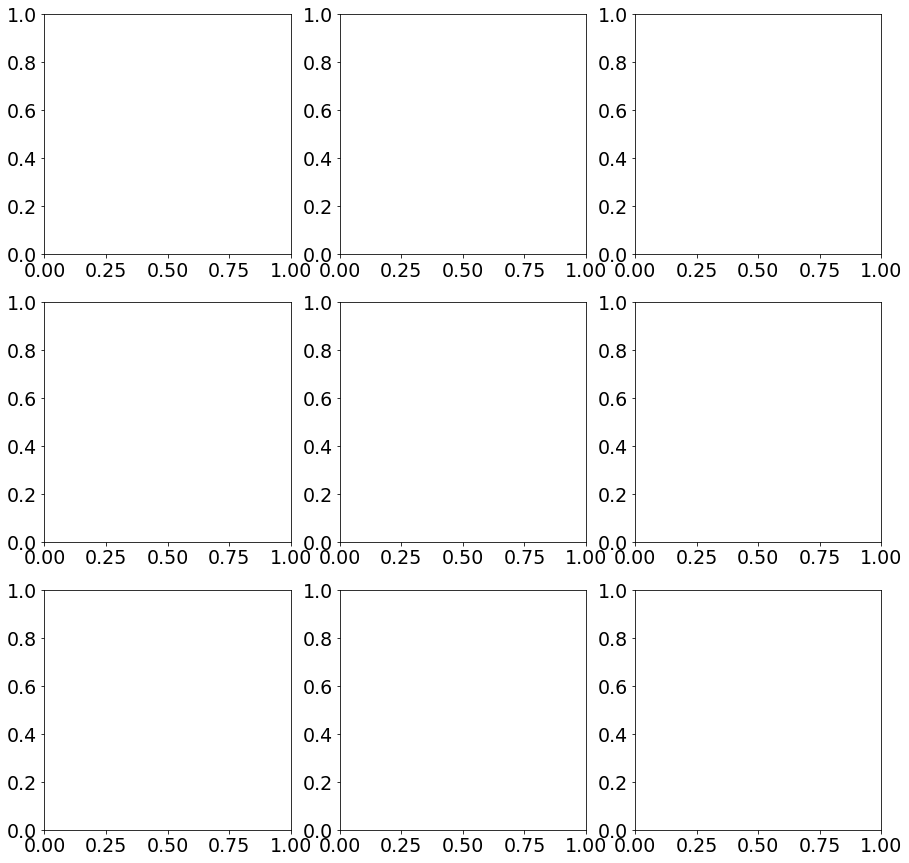

In [429]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))

ax = axs.ravel()
num_bins = 30

for i, row in df_matStereoData.iterrows():

    ax[i].set_title('subject ' + row['subject'])

    rightDurations = row['rightDurations']
    leftDurations = row['leftDurations']

    # the histogram of the data
    n, bins, patches = ax[i].hist(rightDurations, num_bins, color='teal', alpha=0.5, range=(0.001, 5))
    n, bins, patches = ax[i].hist(leftDurations, num_bins, color='orange', alpha=0.5, range=(0.001, 5))




# Red / Blue Mac - stereoscope All subjects

In [438]:
cd /Users/jen/rotation/PilotData/trashcan_mac

/Users/jen/rotation/PilotData/trashcan_mac


In [439]:
# first we need to update the files
uncorrectedDataFiles = ['s06_session1_2021-11-10_BRdata_stereoscope.csv',
                        's08.csv',
                       'ssean_1110_session1_2021-11-10_BRdata_stereoscope.csv']

In [440]:
cwd

'/Users/jen/rotation/PilotData/trashcan_mac'

In [441]:
%%capture
# convert the data

for file in uncorrectedDataFiles:
    convertDataFormat_U(file, 'mac')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jen/rotation/PilotData/trashcan_mac/trashcan_mac/s06_session1_2021-11-10_BRdata_stereoscope.csv'

In [442]:
# first we need to update the files
macStereoDataFiles = ['s06_session1_2021-11-10_BRdata_stereoscope_U.csv',
                        's08_U.csv',
                       'ssean_1110_session1_2021-11-10_BRdata_stereoscope_U.csv']

In [443]:
macStereoDataFiles[1][1:3]

'08'

In [445]:
cd ..

/Users/jen/rotation/PilotData


In [447]:

df_macData_ori = pd.DataFrame([], columns=['subject', 'leftDurations', 'rightDurations', 'blueDurations', 'redDurations', 'mixedDurations', 'leftEDurations', 'rightEDurations'])

for file in macStereoDataFiles:
    print(file)
    
    # open file as a df
    #macDir = os.path.join(cwd, 'trashcan_mac')
    thisFile = os.path.join(cwd, file)
    thisDf = pd.read_csv(thisFile)
    
    string_conv(thisDf, 'keyDur')
    string_conv(thisDf, 'keyName')
    string_conv(thisDf, 'keyRT')
    #string_conv(thisDf, 'topOri')
    #string_conv(thisDf, 'topColor')
    
    subjectID = file[1:3]
    
    blueDurations, redDurations, leftDurations, rightDurations, mixedDurations, leftEDurations, rightEDurations = bucketResponse_basedOnOrientationResp_stereo(thisDf)

    
    df_macData_ori = df_macData_ori.append({'subject' : subjectID,  'leftDurations':leftDurations, 'rightDurations':rightDurations, 'blueDurations':blueDurations, 'redDurations':redDurations, 'mixedDurations':mixedDurations, 'leftEDurations':leftEDurations, 'rightEDurations':rightEDurations}, 
                ignore_index = True)


s06_session1_2021-11-10_BRdata_stereoscope_U.csv
s08_U.csv
ssean_1110_session1_2021-11-10_BRdata_stereoscope_U.csv


In [448]:
df_macData_ori

,subject,leftDurations,rightDurations,blueDurations,redDurations,mixedDurations,leftEDurations,rightEDurations
0,06,"[1.0720825680000416, 0.6320412200002465, 2.800...","[1.6241121700004442, 1.0160928859986598, 1.464...","[1.0720825680000416, 0.6320412200002465, 2.800...","[1.6241121700004442, 1.0160928859986598, 1.464...","[1.7841223039977194, 2.9201291610006592, 1.992...","[1.6241121700004442, 1.0160928859986598, 1.464...","[1.0720825680000416, 0.6320412200002465, 2.800..."
1,08,"[2.9041621050000685, 1.1280251170001065, 1.248...","[2.176126467999893, 0.952035263000198, 0.86409...","[2.9041621050000685, 1.1280251170001065, 1.248...","[2.176126467999893, 0.952035263000198, 0.86409...","[0.12000032000014471, 0.10400263100018492, 5.7...","[2.9041621050000685, 1.1280251170001065, 1.248...","[2.176126467999893, 0.952035263000198, 0.86409..."
2,se,"[0.8800334810002823, 1.5121055970012094, 3.984...","[2.1601610540001275, 2.9121400580006593, 3.128...","[0.8800334810002823, 1.5121055970012094, 3.984...","[2.1601610540001275, 2.9121400580006593, 3.128...","[0.7840558480002073, 1.2400695659998746, 1.424...","[2.1601610540001275, 2.9121400580006593, 3.128...","[0.8800334810002823, 1.5121055970012094, 3.984..."


In [449]:
%%capture
df_macData_ori.loc[0]['leftDurations']

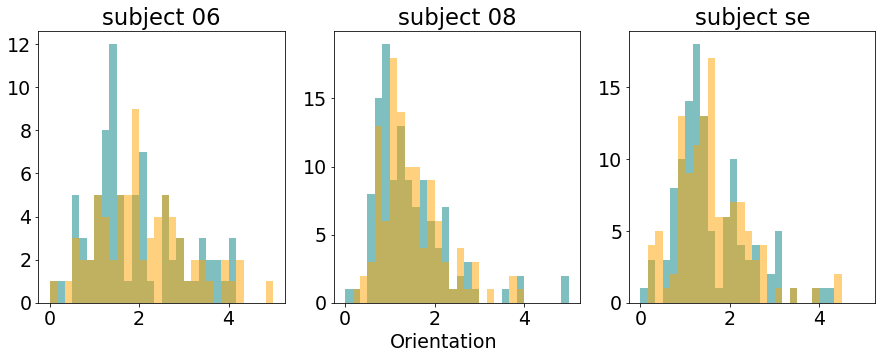

In [450]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))


fig.text(0.5, 0.00, 'Orientation', ha='center')

ax = axs.ravel()
num_bins = 30

for i, row in df_macData_ori.iterrows():

    ax[i].set_title('subject ' + row['subject'])

    rightDurations = row['rightDurations']
    leftDurations = row['leftDurations']

    # the histogram of the data
    n, bins, patches = ax[i].hist(rightDurations, num_bins, color='teal', alpha=0.5, range=(0.001, 5))
    n, bins, patches = ax[i].hist(leftDurations, num_bins, color='orange', alpha=0.5, range=(0.001, 5))




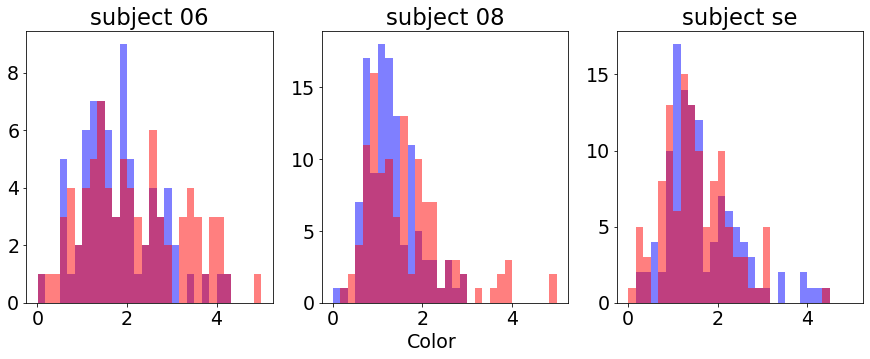

In [451]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

fig.text(0.5, 0.00, 'Color', ha='center')

ax = axs.ravel()
num_bins = 30

for i, row in df_macData_ori.iterrows():

    ax[i].set_title('subject ' + row['subject'])

    blueDurations = row['blueDurations']
    redDurations = row['redDurations']

    # the histogram of the data
    n, bins, patches = ax[i].hist(blueDurations, num_bins, color='blue', alpha=0.5, range=(0.001, 5))
    n, bins, patches = ax[i].hist(redDurations, num_bins, color='red', alpha=0.5, range=(0.001, 5))




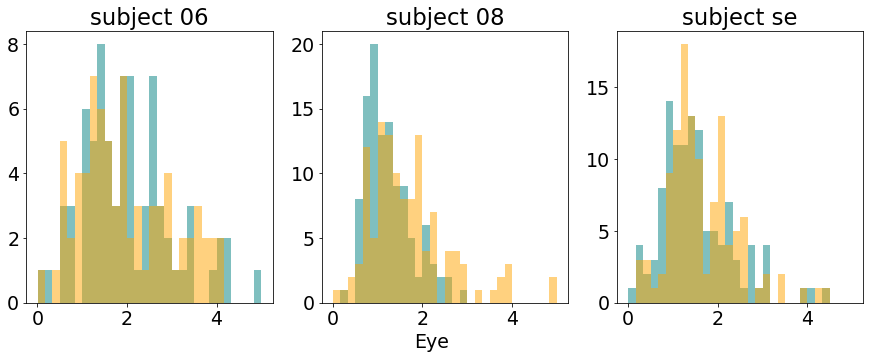

In [452]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

fig.text(0.5, 0.00, 'Eye', ha='center')

ax = axs.ravel()
num_bins = 30

for i, row in df_macData_ori.iterrows():

    ax[i].set_title('subject ' + row['subject'])

    rightEDurations = row['rightEDurations']
    leftEDurations = row['leftEDurations']

    # the histogram of the data
    n, bins, patches = ax[i].hist(rightEDurations, num_bins, color='teal', alpha=0.5, range=(0.001, 5))
    n, bins, patches = ax[i].hist(leftEDurations, num_bins, color='orange', alpha=0.5, range=(0.001, 5))




# Creating orientation data frames from trashcan mac

In [453]:
orimac01 = df_macData_ori[df_macData_ori['subject'] == 'se']
orimac06 = df_macData_ori[df_macData_ori['subject'] == '06']
orimac08 = df_macData_ori[df_macData_ori['subject'] == '08']

In [454]:
orimac01

,subject,leftDurations,rightDurations,blueDurations,redDurations,mixedDurations,leftEDurations,rightEDurations
2,se,"[0.8800334810002823, 1.5121055970012094, 3.984...","[2.1601610540001275, 2.9121400580006593, 3.128...","[0.8800334810002823, 1.5121055970012094, 3.984...","[2.1601610540001275, 2.9121400580006593, 3.128...","[0.7840558480002073, 1.2400695659998746, 1.424...","[2.1601610540001275, 2.9121400580006593, 3.128...","[0.8800334810002823, 1.5121055970012094, 3.984..."


# Laptop - glasses data All subjects

## NOTE: sessions are not being separated by reponse type (color/orientation) yet - that needs to be done! currently just assumes orientation repsonse

In [455]:
cwd

'/Users/jen/rotation/PilotData/trashcan_mac'

In [456]:
cd /Users/jen/rotation/PilotData/BR_laptop_rivalry

/Users/jen/rotation/PilotData/BR_laptop_rivalry


In [457]:
#compare this list to the list below to ensure that we are assigning correct file names 
#to the uncorrected_laptop_files variable
ls

In [458]:
uncorrected_laptop_files = ['sJH_session1_2021-09-17_BRdata.csv',
 's02_session1_2021-11-03_BRdata.csv',
's02_session2_2021-11-03_BRdata.csv',
's01_session99_2021-11-02_BRdata.csv',
's03_session1_2021-11-05_BRdata.csv',
's03_session3_2021-11-05_BRdata.csv',
's08_session1_2021-11-09_BRdata.csv',
's08_session2_2021-11-10_BRdata.csv',
'ssean_1110_session1_2021-11-10_BRdata.csv',
's06_session2_2021-11-10_BRdata.csv',
's06_session1_2021-11-10_BRdata.csv',
'sLL_session1_2021-11-03_BRdata.csv']

In [459]:
%%capture
#converts files from uncorrected list to corrected data format
for file in uncorrected_laptop_files:
    convertDataFormat_U(file, 'laptop')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jen/rotation/PilotData/trashcan_mac/BR_laptop_rivalry/sJH_session1_2021-09-17_BRdata.csv'

In [460]:
ls *U.csv

s01_session99_2021-11-02_BRdata_U.csv
s02_session1_2021-11-03_BRdata_U.csv
s02_session2_2021-11-03_BRdata_U.csv
s03_session1_2021-11-05_BRdata_U.csv
s03_session3_2021-11-05_BRdata_U.csv
s06_session1_2021-11-10_BRdata_U.csv
s06_session2_2021-11-10_BRdata_U.csv
s08_session1_2021-11-09_BRdata_U.csv
s08_session2_2021-11-10_BRdata_U.csv
sJH_session1_2021-09-17_BRdata_U.csv
sLL_session1_2021-11-03_BRdata_U.csv
ssean_1110_session1_2021-11-10_BRdata_U.csv


In [461]:
#this collects orientation response trials for the laptop into one list; expand when adding additional subjects
laptop_files_orientation = [
's06_session2_2021-11-10_BRdata_U.csv',
's08_session2_2021-11-10_BRdata_U.csv',
'ssean_1110_session1_2021-11-10_BRdata_U.csv']

In [462]:
#this collects color response trials for the laptop into one list; expand when adding additional subjects
laptop_files_color = ['s01_session99_2021-11-02_BRdata_U.csv',
's06_session1_2021-11-10_BRdata_U.csv',
's08_session1_2021-11-09_BRdata_U.csv',
]

In [464]:
cwd

'/Users/jen/rotation/PilotData/trashcan_mac'

In [470]:
cd /Users/jen/rotation/PilotData/

/Users/jen/rotation/PilotData


In [472]:
#creates nice dataframe for laptop trials when subjects were responding based on color

df_laptopDataColor = pd.DataFrame([], columns=['subject', 'leftDurations', 'rightDurations', 'blueDurations', 'redDurations', 'mixedDurations'])

for file in laptop_files_color:
    print(file)
    
    # open file as a df
    #macDir = os.path.join(cwd, 'trashcan_mac')
    thisFile = os.path.join('/Users/jen/rotation/PilotData/BR_laptop_rivalry', file)
    thisDf = pd.read_csv(thisFile)
    
    string_conv(thisDf, 'keyDur')
    string_conv(thisDf, 'keyName')
    string_conv(thisDf, 'keyRT')
    #string_conv(thisDf, 'topOri')
    #string_conv(thisDf, 'topColor')
    
    subjectID = file[1:3]
    
    blueDurations, redDurations, leftDurations, rightDurations, mixedDurations = bucketResponse_basedOnColorResp_lp(thisDf)

    
    df_laptopDataColor = df_laptopDataColor.append({'subject' : subjectID,  'leftDurations':leftDurations, 'rightDurations':rightDurations, 'blueDurations':blueDurations, 'redDurations':redDurations, 'mixedDurations':mixedDurations}, 
                ignore_index = True)


s01_session99_2021-11-02_BRdata_U.csv
s06_session1_2021-11-10_BRdata_U.csv
s08_session1_2021-11-09_BRdata_U.csv


In [473]:
#creates nice dataframe for laptop trials when subjects were responding based on orientation

df_laptopDataOrientation = pd.DataFrame([], columns=['subject', 'leftDurations', 'rightDurations', 'blueDurations', 'redDurations', 'mixedDurations'])

for file in laptop_files_orientation:
    print(file)
    
    # open file as a df
    #macDir = os.path.join(cwd, 'trashcan_mac')
    thisFile = os.path.join('/Users/jen/rotation/PilotData/BR_laptop_rivalry', file)
    thisDf = pd.read_csv(thisFile)
    
    string_conv(thisDf, 'keyDur')
    string_conv(thisDf, 'keyName')
    string_conv(thisDf, 'keyRT')
    #string_conv(thisDf, 'topOri')
    #string_conv(thisDf, 'topColor')
    
    subjectID = file[1:3]
    
    blueDurations, redDurations, leftDurations, rightDurations, mixedDurations = bucketResponse_basedOnOrientationResp_lp(thisDf)

    
    df_laptopDataOrientation = df_laptopDataOrientation.append({'subject' : subjectID,  'leftDurations':leftDurations, 'rightDurations':rightDurations, 'blueDurations':blueDurations, 'redDurations':redDurations, 'mixedDurations':mixedDurations}, 
                ignore_index = True)

s06_session2_2021-11-10_BRdata_U.csv
s08_session2_2021-11-10_BRdata_U.csv
ssean_1110_session1_2021-11-10_BRdata_U.csv


# laptop color response!

In [10]:
df_laptopDataColor

NameError: name 'df_laptopDataColor' is not defined

# Creating dataframes for laptop when responding based on color

In [475]:
color01 = df_laptopDataColor[df_laptopDataColor['subject'] == '01']
color06 = df_laptopDataColor[df_laptopDataColor['subject'] == '06']
color08 = df_laptopDataColor[df_laptopDataColor['subject'] == '08']


# laptop orientation response!

In [477]:
df_laptopDataOrientation

,subject,leftDurations,rightDurations,blueDurations,redDurations,mixedDurations
0,06,"[1.2188989999704063, 1.808515999931842, 1.2534...","[1.5508628999814391, 1.5247491999762133, 1.535...","[1.926839099964127, 2.2819582000374794, 0.5975...","[1.5508628999814391, 1.2188989999704063, 1.524...","[1.0035232999362051, 0.14094829990062863, 1.28..."
1,08,"[1.6363195000449196, 1.8917446000268683, 0.690...","[1.0381445999955758, 0.7230349000310525, 0.970...","[1.0381445999955758, 1.6363195000449196, 0.723...","[0.07237339997664094, 0.985528799938038, 0.819...","[6.97206079994794, 0.7834343999857083, 8.88582..."
2,se,"[0.5472666999557987, 1.2018488999456167, 0.994...","[1.1383961000246927, 1.2317181000253186, 1.530...","[1.1383961000246927, 0.5472666999557987, 1.231...","[4.171611899975687, 2.2199886000016704, 2.6089...","[0.9508654000237584, 0.5346238999627531, 2.732..."


# Creating dataframes for laptop when responding based on orientation

In [478]:
ori01 = df_laptopDataOrientation[df_laptopDataOrientation['subject'] == 'se']
ori06 = df_laptopDataOrientation[df_laptopDataOrientation['subject'] == '06']
ori08 = df_laptopDataOrientation[df_laptopDataOrientation['subject'] == '08']

# Question #1: Does reporting binocular rivalry switching based on color versus based on orientation influence duration dynamics?
* Maybe focusing on color perception influences the duration dynamics?
* Does color duration change depending on whether the subject was reporting via orientation or color?
* Does orientation duration change depending on whether the subject was reporting switching via orientation or color?


# Subject 06: Histograms "comparing" color or orientation duration based on what the subject was responding to (color or orientation) for laptop

Text(0.5, 0, 'Rivalry duration (s)')

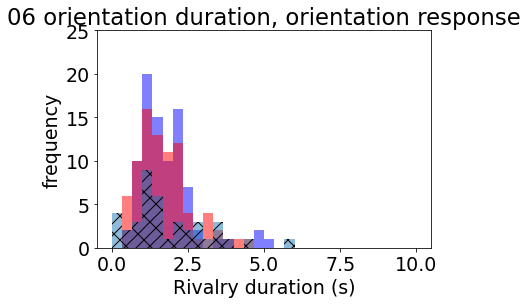

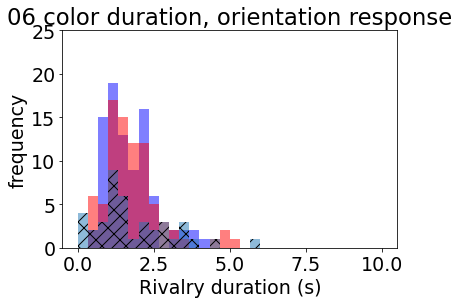

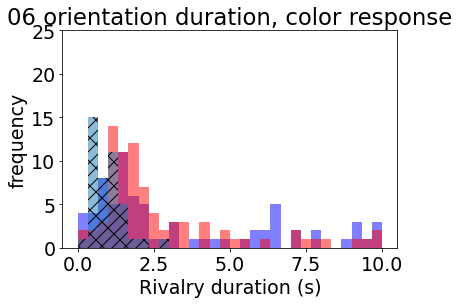

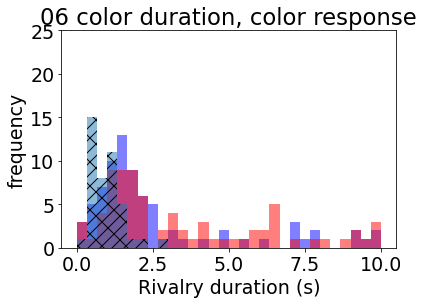

In [479]:
fig, ax = plt.subplots()
num_bins = 30

# orientation durations while responding with orientation
plt.title('06 orientation duration, orientation response')
n, bins, patches = ax.hist(ori06['rightDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(ori06['leftDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(ori06['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 10))

ax.set_ylabel('frequency')
ax.set_ylim(0,25)
ax.set_xlabel('Rivalry duration (s)')


# color durations while responding with orientation
fig, ax = plt.subplots()
num_bins = 30
plt.title('06 color duration, orientation response')
n, bins, patches = ax.hist(ori06['blueDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(ori06['redDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(ori06['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 10))

ax.set_ylabel('frequency')
ax.set_ylim(0,25)
ax.set_xlabel('Rivalry duration (s)')


# orientation durations while responding with color
fig, ax = plt.subplots()
num_bins = 30
plt.title('06 orientation duration, color response')
n, bins, patches = ax.hist(color06['rightDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(color06['leftDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(color06['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 10))

ax.set_ylabel('frequency')
ax.set_ylim(0,25)
ax.set_xlabel('Rivalry duration (s)')

# color durations while responding with color
fig, ax = plt.subplots()
num_bins = 30
plt.title('06 color duration, color response')
n, bins, patches = ax.hist(color06['blueDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(color06['redDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(color06['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 10))

ax.set_ylabel('frequency')
ax.set_ylim(0,25)
ax.set_xlabel('Rivalry duration (s)')


# Subject 08: Histograms "comparing" color or orientation duration based on what the subject was responding to (color or orientation) for laptop

Text(0.5, 0, 'Rivalry duration (s)')

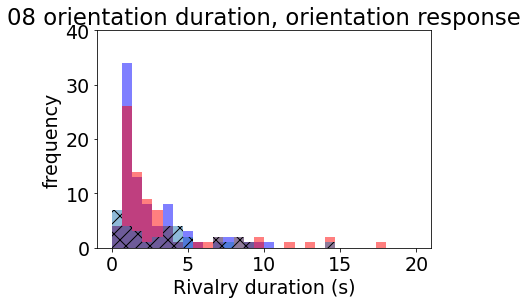

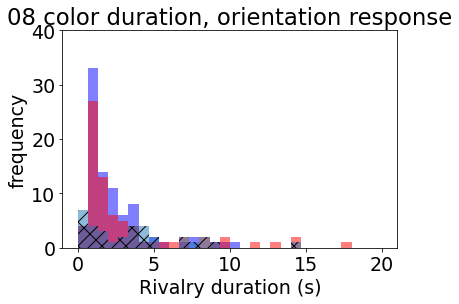

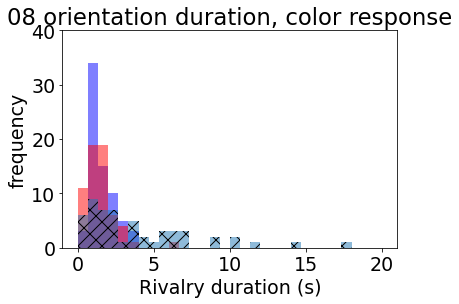

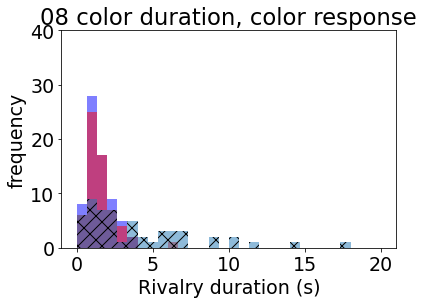

In [480]:
fig, ax = plt.subplots()
num_bins = 30

# orientation durations while responding with orientation
plt.title('08 orientation duration, orientation response')
n, bins, patches = ax.hist(ori08['rightDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(ori08['leftDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(ori08['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 20))

ax.set_ylabel('frequency')
ax.set_ylim(0,40)
ax.set_xlabel('Rivalry duration (s)')


# color durations while responding with orientation
fig, ax = plt.subplots()
num_bins = 30
plt.title('08 color duration, orientation response')
n, bins, patches = ax.hist(ori08['blueDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(ori08['redDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(ori08['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 20))

ax.set_ylabel('frequency')
ax.set_ylim(0,40)
ax.set_xlabel('Rivalry duration (s)')

# orientation durations while responding with color
fig, ax = plt.subplots()
num_bins = 30
plt.title('08 orientation duration, color response')
n, bins, patches = ax.hist(color08['rightDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(color08['leftDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(color08['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 20))

ax.set_ylabel('frequency')
ax.set_ylim(0,40)
ax.set_xlabel('Rivalry duration (s)')

# color durations while responding with color
fig, ax = plt.subplots()
num_bins = 30
plt.title('08 color duration, color response')
n, bins, patches = ax.hist(color08['blueDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(color08['redDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(color08['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 20))

ax.set_ylabel('frequency')
ax.set_ylim(0,40)
ax.set_xlabel('Rivalry duration (s)')



# Subject 01: Histograms "comparing" color or orientation duration based on what the subject was responding to (color or orientation) for laptop

Text(0.5, 0, 'Rivalry duration (s)')

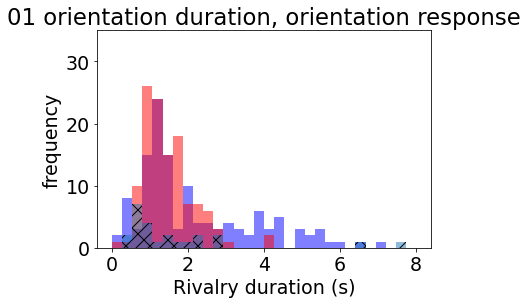

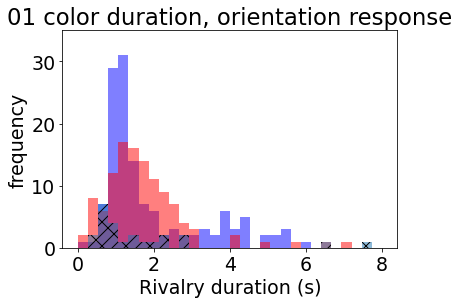

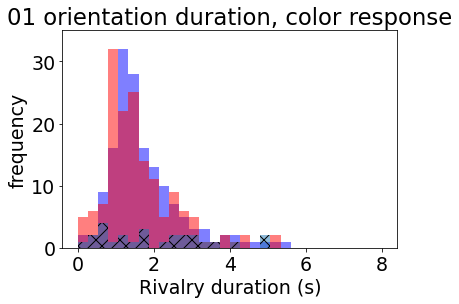

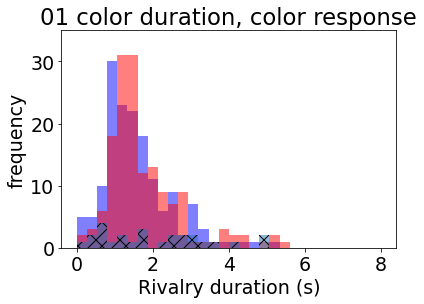

In [481]:
fig, ax = plt.subplots()
num_bins = 30

# orientation durations while responding with orientation
plt.title('01 orientation duration, orientation response')
n, bins, patches = ax.hist(ori01['rightDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(ori01['leftDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(ori01['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 8))

ax.set_ylabel('frequency')
ax.set_ylim(0,35)
ax.set_xlabel('Rivalry duration (s)')

# color durations while responding with orientation
fig, ax = plt.subplots()
num_bins = 30
plt.title('01 color duration, orientation response')
n, bins, patches = ax.hist(ori01['blueDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(ori01['redDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(ori01['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 8))

ax.set_ylabel('frequency')
ax.set_ylim(0,35)
ax.set_xlabel('Rivalry duration (s)')

# orientation durations while responding with color
fig, ax = plt.subplots()
num_bins = 30
plt.title('01 orientation duration, color response')
n, bins, patches = ax.hist(color01['rightDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(color01['leftDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(color01['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 8))

ax.set_ylabel('frequency')
ax.set_ylim(0,35)
ax.set_xlabel('Rivalry duration (s)')

# color durations while responding with color
fig, ax = plt.subplots()
num_bins = 30
plt.title('01 color duration, color response')
n, bins, patches = ax.hist(color01['blueDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(color01['redDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(color01['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 8))

ax.set_ylabel('frequency')
ax.set_ylim(0,35)
ax.set_xlabel('Rivalry duration (s)')


# Question #2: How do binocular rivalry dynamics look when responding on orientation between the laptop and the trashcan mac which uses the CRT?

Text(0.5, 0, 'Rivalry duration (s)')

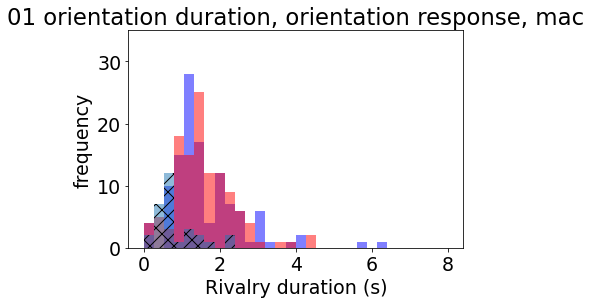

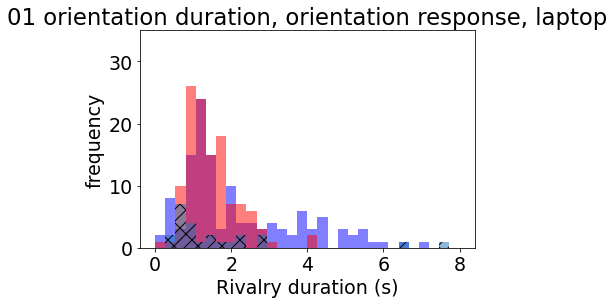

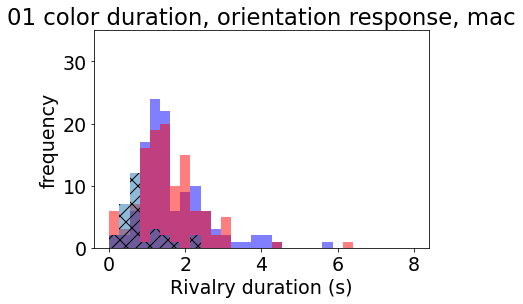

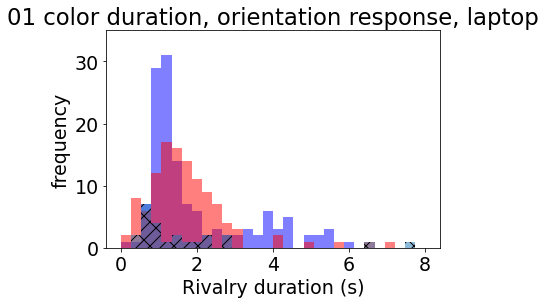

In [482]:
fig, ax = plt.subplots()
num_bins = 30

# orientation durations while responding with orientation on MAC
plt.title('01 orientation duration, orientation response, mac')
n, bins, patches = ax.hist(orimac01['rightDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(orimac01['leftDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(orimac01['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 8))

ax.set_ylabel('frequency')
ax.set_ylim(0,35)
ax.set_xlabel('Rivalry duration (s)')

# orientation durations while responding with orientation on LAPTOP
fig, ax = plt.subplots()
num_bins = 30
plt.title('01 orientation duration, orientation response, laptop')
n, bins, patches = ax.hist(ori01['rightDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(ori01['leftDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(ori01['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 8))

ax.set_ylabel('frequency')
ax.set_ylim(0,35)
ax.set_xlabel('Rivalry duration (s)')

# color durations while responding with orientation on MAC
fig, ax = plt.subplots()
num_bins = 30
plt.title('01 color duration, orientation response, mac')
n, bins, patches = ax.hist(orimac01['blueDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(orimac01['redDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(orimac01['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 8))

ax.set_ylabel('frequency')
ax.set_ylim(0,35)
ax.set_xlabel('Rivalry duration (s)')

# color durations while responding with orientation on LAPTOP
fig, ax = plt.subplots()
num_bins = 30
plt.title('01 color duration, orientation response, laptop')
n, bins, patches = ax.hist(ori01['blueDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(ori01['redDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 8))
n, bins, patches = ax.hist(ori01['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 8))

ax.set_ylabel('frequency')
ax.set_ylim(0,35)
ax.set_xlabel('Rivalry duration (s)')



Text(0.5, 0, 'Rivalry duration (s)')

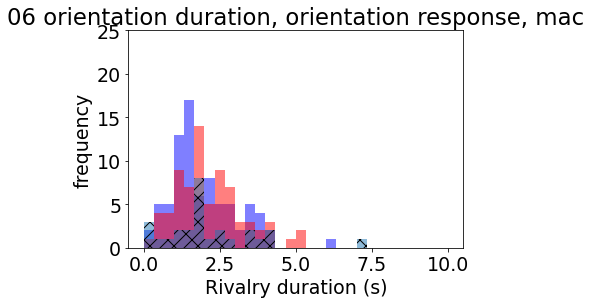

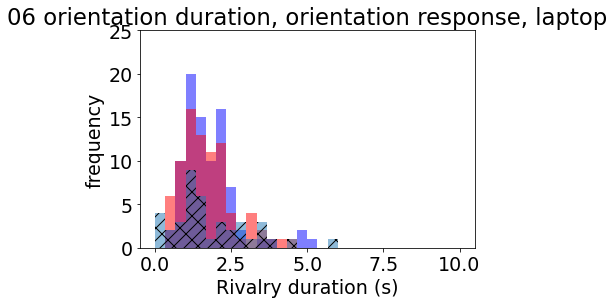

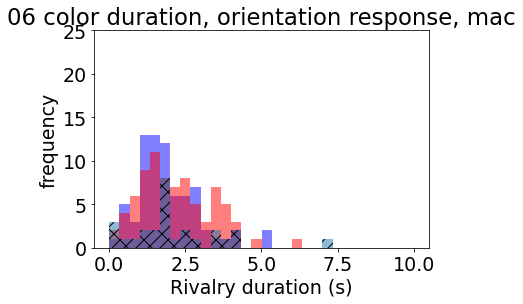

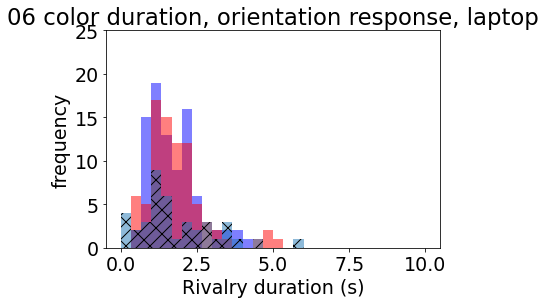

In [483]:
fig, ax = plt.subplots()
num_bins = 30

# orientation durations while responding with orientation on MAC
plt.title('06 orientation duration, orientation response, mac')
n, bins, patches = ax.hist(orimac06['rightDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(orimac06['leftDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(orimac06['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 10))

ax.set_ylabel('frequency')
ax.set_ylim(0,25)
ax.set_xlabel('Rivalry duration (s)')

# orientation durations while responding with orientation on LAPTOP
fig, ax = plt.subplots()
num_bins = 30
plt.title('06 orientation duration, orientation response, laptop')
n, bins, patches = ax.hist(ori06['rightDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(ori06['leftDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(ori06['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 10))

ax.set_ylabel('frequency')
ax.set_ylim(0,25)
ax.set_xlabel('Rivalry duration (s)')

# color durations while responding with orientation on MAC
fig, ax = plt.subplots()
num_bins = 30
plt.title('06 color duration, orientation response, mac')
n, bins, patches = ax.hist(orimac06['blueDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(orimac06['redDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(orimac06['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 10))

ax.set_ylabel('frequency')
ax.set_ylim(0,25)
ax.set_xlabel('Rivalry duration (s)')

# color durations while responding with orientation on LAPTOP
fig, ax = plt.subplots()
num_bins = 30
plt.title('06 color duration, orientation response, laptop')
n, bins, patches = ax.hist(ori06['blueDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(ori06['redDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 10))
n, bins, patches = ax.hist(ori06['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 10))

ax.set_ylabel('frequency')
ax.set_ylim(0,25)
ax.set_xlabel('Rivalry duration (s)')


Text(0.5, 0, 'Rivalry duration (s)')

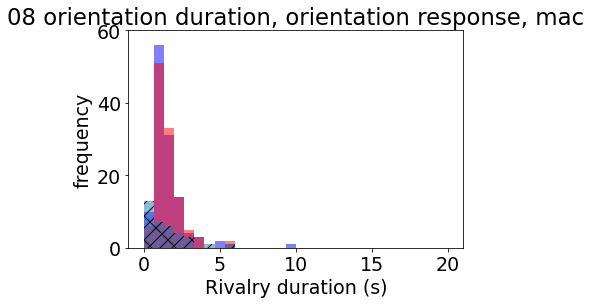

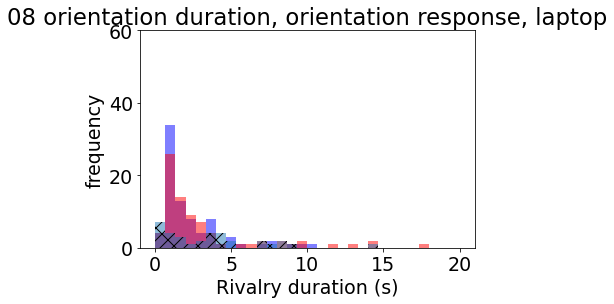

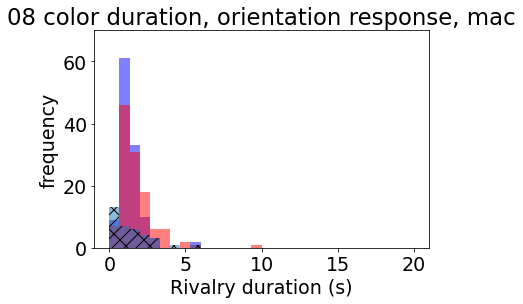

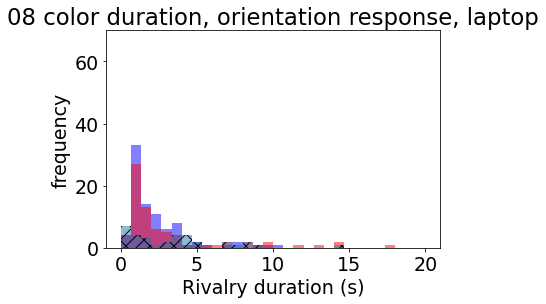

In [484]:
fig, ax = plt.subplots()
num_bins = 30

# orientation durations while responding with orientation on MAC
plt.title('08 orientation duration, orientation response, mac')
n, bins, patches = ax.hist(orimac08['rightDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(orimac08['leftDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(orimac08['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 20))

ax.set_ylabel('frequency')
ax.set_ylim(0,60)
ax.set_xlabel('Rivalry duration (s)')

# orientation durations while responding with orientation on LAPTOP
fig, ax = plt.subplots()
num_bins = 30
plt.title('08 orientation duration, orientation response, laptop')
n, bins, patches = ax.hist(ori08['rightDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(ori08['leftDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(ori08['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 20))

ax.set_ylabel('frequency')
ax.set_ylim(0,60)
ax.set_xlabel('Rivalry duration (s)')

# color durations while responding with orientation on MAC
fig, ax = plt.subplots()
num_bins = 30
plt.title('08 color duration, orientation response, mac')
n, bins, patches = ax.hist(orimac08['blueDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(orimac08['redDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(orimac08['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 20))

ax.set_ylabel('frequency')
ax.set_ylim(0,70)
ax.set_xlabel('Rivalry duration (s)')

# color durations while responding with orientation on LAPTOP
fig, ax = plt.subplots()
num_bins = 30
plt.title('08 color duration, orientation response, laptop')
n, bins, patches = ax.hist(ori08['blueDurations'], num_bins, color='blue', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(ori08['redDurations'], num_bins, color='red', alpha=0.5, range=(0.001, 20))
n, bins, patches = ax.hist(ori08['mixedDurations'], num_bins, hatch='\\//', alpha=0.5, range=(0.001, 20))

ax.set_ylabel('frequency')
ax.set_ylim(0,70)
ax.set_xlabel('Rivalry duration (s)')


In [ ]:
%%capture
#2x2 subplot
#first one; orientation observed based on color

#sub08_laptop = df_laptopData[df_laptopData['subject'] == '08']


#subplot dimensions and size and shit
fig, axs = plt.subplots(2, 2, figsize=(20,15))

#defining number of bins? 
ax = ax.ravel()
num_bins = 30

#for loop to 
for i, row in df_laptopDataOrientation.iterrows():
    
    ax[i].set_title('subject' + row['subject'] + 'orientation saw when orientation was reported')
    
    rightDurations = row['rightDurations']
    leftDurations = row['leftDurations']
    
    # the histogram of the data
    n, bins, patches = ax[i].hist(rightDurations, num_bins, color='teal', alpha=0.5, range=(0.001, 5))
    n, bins, patches = ax[i].hist(leftDurations, num_bins, color='orange', alpha=0.5, range=(0.001, 5))


In [ ]:
##laptop comparisons on orientation!
fig, axs = plt.subplots(3, 4, figsize=(20,15))


fig.text(0.5, 0.00, 'Orientation', ha='center')

ax = axs.ravel()
num_bins = 30

for i, row in df_laptopDataOrientation.iterrows():

    ax[i].set_title('subject ' + row['subject'])

    rightDurations = row['rightDurations']
    leftDurations = row['leftDurations']

    # the histogram of the data
    n, bins, patches = ax[i].hist(rightDurations, num_bins, color='teal', alpha=0.5, range=(0.001, 5))
    n, bins, patches = ax[i].hist(leftDurations, num_bins, color='orange', alpha=0.5, range=(0.001, 5))




In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

fig.text(0.5, 0.00, 'Color', ha='center')

ax = axs.ravel()
num_bins = 30

for i, row in df_laptopData.iterrows():

    ax[i].set_title('subject ' + row['subject'])

    blueDurations = row['blueDurations']
    redDurations = row['redDurations']

    # the histogram of the data
    n, bins, patches = ax[i].hist(blueDurations, num_bins, color='blue', alpha=0.5, range=(0.001, 5))
    n, bins, patches = ax[i].hist(redDurations, num_bins, color='red', alpha=0.5, range=(0.001, 5))




# Summary

## 3 data frames
- grayscale stereoscope data: df_matStereoData
- trashcan mac stereoscope data: df_macData
- laptop red/blue glasses data: df_laptopData

## Histograms
- histograms have been plotted by stimulus condition
- and split by orientation of stimuli, color of stimuli, and eye of stimuli (if available)


### To Dos:
- make groups of plots by subject compared across the computers
- plot data from laptop based on eye color in red/blue glasses
- Liz to do: eye data for matlab files

    

#### To access an individuals compilted data 

In [ ]:
sub08_mac = df_macData[df_macData['subject'] == '08']

In [ ]:
sub08_mac # look at the data

In [ ]:
sub08_laptop = df_laptopData[df_laptopData['subject'] == '08']

In [ ]:
sub08_laptop

### ↑ NOTE: since sub08 did two runs of laptop rivalry, there's two rows (not two trials). 
-Need to separate by row 1 - respond on color and row 2 - respond on orientation

In [ ]:
sub08_gray = df_matStereoData[df_matStereoData['subject'] == '08']

In [ ]:
sub08_gray